In [ ]:
import pandas as pd
import numpy as np
import random
import requests

!pip install seaborn

# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Analysis of a player winning

In [ ]:
def data_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [ ]:
# Ergast API Url

#for tracking two decade
start_year = 2022;
standings =[]

for x in reversed(range(start_year + 1)):
  if x == start_year - 20 : break
  api_url = "http://ergast.com/api/f1/{}/driverStandings.json".format(x)
  
  api_response = requests.get(api_url).json() 

  print(api_response['MRData']['StandingsTable']['StandingsLists'][0]['season'])
  standings.append(api_response['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'])
  print(api_response['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'][0])
  print(api_response['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings'][0]['Driver']['driverId'])

2022
{'position': '1', 'positionText': '1', 'points': '454', 'wins': '15', 'Driver': {'driverId': 'max_verstappen', 'permanentNumber': '33', 'code': 'VER', 'url': 'http://en.wikipedia.org/wiki/Max_Verstappen', 'givenName': 'Max', 'familyName': 'Verstappen', 'dateOfBirth': '1997-09-30', 'nationality': 'Dutch'}, 'Constructors': [{'constructorId': 'red_bull', 'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing', 'name': 'Red Bull', 'nationality': 'Austrian'}]}
max_verstappen
2021
{'position': '1', 'positionText': '1', 'points': '395.5', 'wins': '10', 'Driver': {'driverId': 'max_verstappen', 'permanentNumber': '33', 'code': 'VER', 'url': 'http://en.wikipedia.org/wiki/Max_Verstappen', 'givenName': 'Max', 'familyName': 'Verstappen', 'dateOfBirth': '1997-09-30', 'nationality': 'Dutch'}, 'Constructors': [{'constructorId': 'red_bull', 'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing', 'name': 'Red Bull', 'nationality': 'Austrian'}]}
max_verstappen
2020
{'position': '1', 'positionText': '1'

In [ ]:
extracted_standings = []
for i in range(len(standings)):
  for x in range(len(standings[i])):
    extracted_standings.append(standings[i][x])
    print(standings[i][x])

{'position': '1', 'positionText': '1', 'points': '454', 'wins': '15', 'Driver': {'driverId': 'max_verstappen', 'permanentNumber': '33', 'code': 'VER', 'url': 'http://en.wikipedia.org/wiki/Max_Verstappen', 'givenName': 'Max', 'familyName': 'Verstappen', 'dateOfBirth': '1997-09-30', 'nationality': 'Dutch'}, 'Constructors': [{'constructorId': 'red_bull', 'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing', 'name': 'Red Bull', 'nationality': 'Austrian'}]}
{'position': '2', 'positionText': '2', 'points': '308', 'wins': '3', 'Driver': {'driverId': 'leclerc', 'permanentNumber': '16', 'code': 'LEC', 'url': 'http://en.wikipedia.org/wiki/Charles_Leclerc', 'givenName': 'Charles', 'familyName': 'Leclerc', 'dateOfBirth': '1997-10-16', 'nationality': 'Monegasque'}, 'Constructors': [{'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}]}
{'position': '3', 'positionText': '3', 'points': '305', 'wins': '2', 'Driver': {'driver

In [ ]:
final_data =[]

for j in range(len(extracted_standings)):
  intermediate_data = {
      'id': extracted_standings[j]['Driver']['driverId'],
      'driver':extracted_standings[j]['Driver']['givenName'] +' '+ extracted_standings[j]['Driver']['familyName'],
      'nationality': extracted_standings[j]['Driver']['nationality'],
      'constructor': extracted_standings[j]['Constructors'][0]['constructorId'],
      'wins':extracted_standings[j]['wins'],
      'points':extracted_standings[j]['points'],
      
  }
  final_data.append(intermediate_data)

In [ ]:
final_df = pd.DataFrame(final_data)

In [ ]:
final_df['wins'] = final_df['wins'].astype(int)
final_df['points'] = final_df['points'].astype(float)

final_df.head()

,id,driver,nationality,constructor,wins,points
0,max_verstappen,Max Verstappen,Dutch,red_bull,15,454.0
1,leclerc,Charles Leclerc,Monegasque,ferrari,3,308.0
2,perez,Sergio Pérez,Mexican,red_bull,2,305.0
3,russell,George Russell,British,mercedes,1,275.0
4,sainz,Carlos Sainz,Spanish,ferrari,1,246.0


In [ ]:
groupby_df1 = final_df.groupby('driver')['points'].sum().reset_index()

sorted_df1=groupby_df1.sort_values('points', ascending=False)

sorted_df1.head()

,driver,points
52,Lewis Hamilton,4405.5
90,Sebastian Vettel,3098.0
23,Fernando Alonso,2061.0
59,Max Verstappen,2011.5
49,Kimi Räikkönen,1840.0


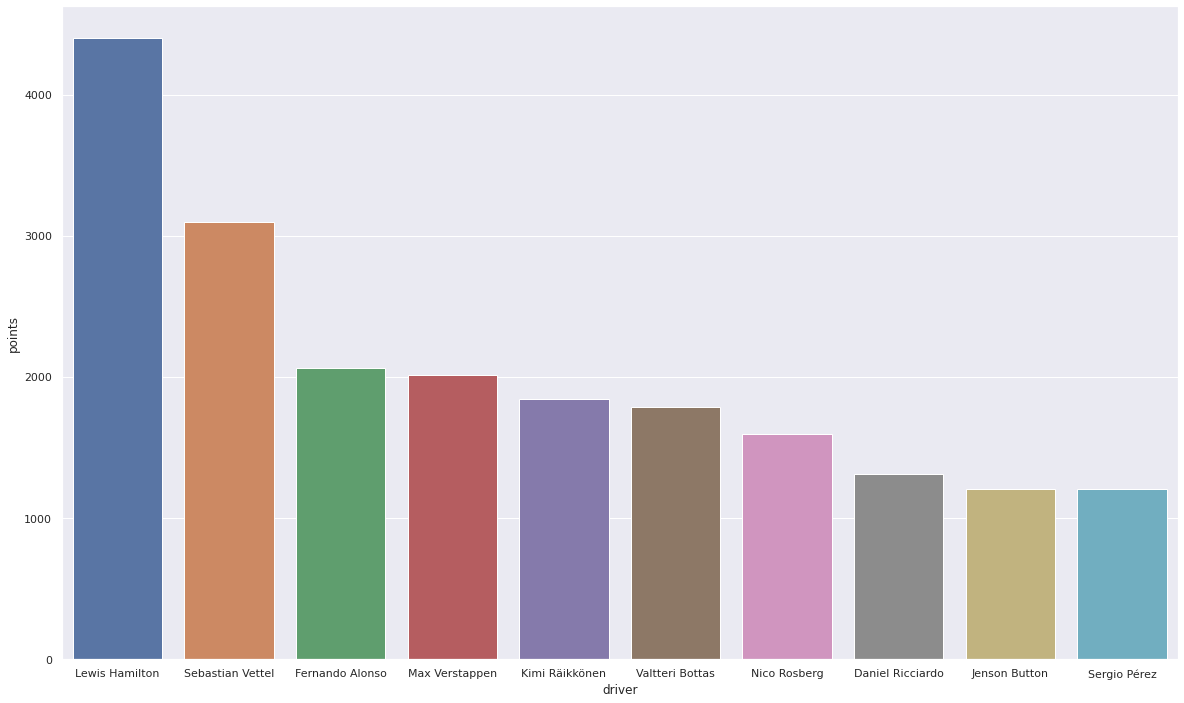

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
sns.barplot(data=sorted_df1.nlargest(10, 'points'), x="driver", y="points")

In [ ]:
groupby_df = final_df.groupby('driver')['wins'].sum().reset_index()

sorted_df=groupby_df.sort_values('wins', ascending=False)

sorted_df.head()

,driver,wins
52,Lewis Hamilton,103
90,Sebastian Vettel,53
59,Max Verstappen,35
23,Fernando Alonso,32
60,Michael Schumacher,27


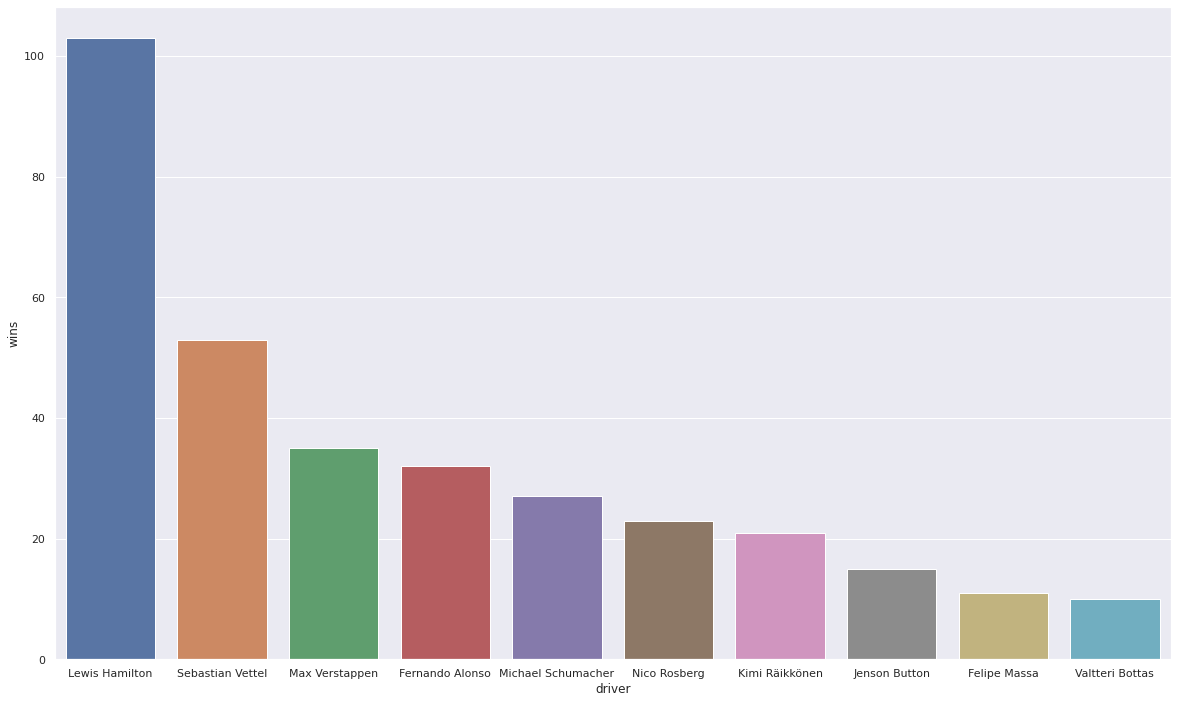

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
sns.barplot(data=sorted_df.nlargest(10, 'wins'), x="driver", y="wins")

# Analysis of Teams winning

In [ ]:
# Ergast API Url

#for tracking two decade
start_year = 2022;
constructor_standings =[]

for x in reversed(range(start_year + 1)):
  if x == start_year - 20 : break
  api_url = "http://ergast.com/api/f1/{}/constructorStandings.json".format(x)
  
  api_response = requests.get(api_url).json() 

  print(api_response['MRData']['StandingsTable']['StandingsLists'][0]['season'])
  constructor_standings.append(api_response['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings'])
  print(api_response['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings'][0])

2022
{'position': '1', 'positionText': '1', 'points': '759', 'wins': '17', 'Constructor': {'constructorId': 'red_bull', 'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing', 'name': 'Red Bull', 'nationality': 'Austrian'}}
2021
{'position': '1', 'positionText': '1', 'points': '613.5', 'wins': '9', 'Constructor': {'constructorId': 'mercedes', 'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One', 'name': 'Mercedes', 'nationality': 'German'}}
2020
{'position': '1', 'positionText': '1', 'points': '573', 'wins': '13', 'Constructor': {'constructorId': 'mercedes', 'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One', 'name': 'Mercedes', 'nationality': 'German'}}
2019
{'position': '1', 'positionText': '1', 'points': '739', 'wins': '15', 'Constructor': {'constructorId': 'mercedes', 'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One', 'name': 'Mercedes', 'nationality': 'German'}}
2018
{'position': '1', 'positionText': '1', 'points': '655', 'wins': '11',

In [ ]:
extracted_contractor_standings = []
for i in range(len(constructor_standings)):
  for x in range(len(constructor_standings[i])):
    extracted_contractor_standings.append(constructor_standings[i][x])
    print(constructor_standings[i][x])

{'position': '1', 'positionText': '1', 'points': '759', 'wins': '17', 'Constructor': {'constructorId': 'red_bull', 'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing', 'name': 'Red Bull', 'nationality': 'Austrian'}}
{'position': '2', 'positionText': '2', 'points': '554', 'wins': '4', 'Constructor': {'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}}
{'position': '3', 'positionText': '3', 'points': '515', 'wins': '1', 'Constructor': {'constructorId': 'mercedes', 'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One', 'name': 'Mercedes', 'nationality': 'German'}}
{'position': '4', 'positionText': '4', 'points': '173', 'wins': '0', 'Constructor': {'constructorId': 'alpine', 'url': 'http://en.wikipedia.org/wiki/Alpine_F1_Team', 'name': 'Alpine F1 Team', 'nationality': 'French'}}
{'position': '5', 'positionText': '5', 'points': '159', 'wins': '0', 'Constructor': {'constructorId': 'mclaren', 'url': '

In [ ]:
final_contractor_data =[]

for j in range(len(extracted_contractor_standings)):
  intermediate_contractor_data = {
      'id': extracted_contractor_standings[j]['Constructor']['constructorId'],
      'constructor': extracted_contractor_standings[j]['Constructor']['name'],
      'nationality': extracted_contractor_standings[j]['Constructor']['nationality'],
      'wins':extracted_contractor_standings[j]['wins'],
      'points':extracted_contractor_standings[j]['points'],
      
  }
  final_contractor_data.append(intermediate_contractor_data)

In [ ]:
final_contractor_df = pd.DataFrame(final_contractor_data)

In [ ]:
final_contractor_df['wins'] = final_contractor_df['wins'].astype(int)
final_contractor_df.head()

,id,Constructor,nationality,wins,points
0,red_bull,Red Bull,Austrian,17,759
1,ferrari,Ferrari,Italian,4,554
2,mercedes,Mercedes,German,1,515
3,alpine,Alpine F1 Team,French,0,173
4,mclaren,McLaren,British,0,159


In [ ]:
groupby_contractor_df = final_contractor_df.groupby('Constructor')['wins'].sum().reset_index()

sorted_contractor_df=groupby_contractor_df.sort_values('wins', ascending=False)

sorted_contractor_df.head()

,Constructor,wins
21,Mercedes,116
24,Red Bull,92
8,Ferrari,83
20,McLaren,48
25,Renault,20


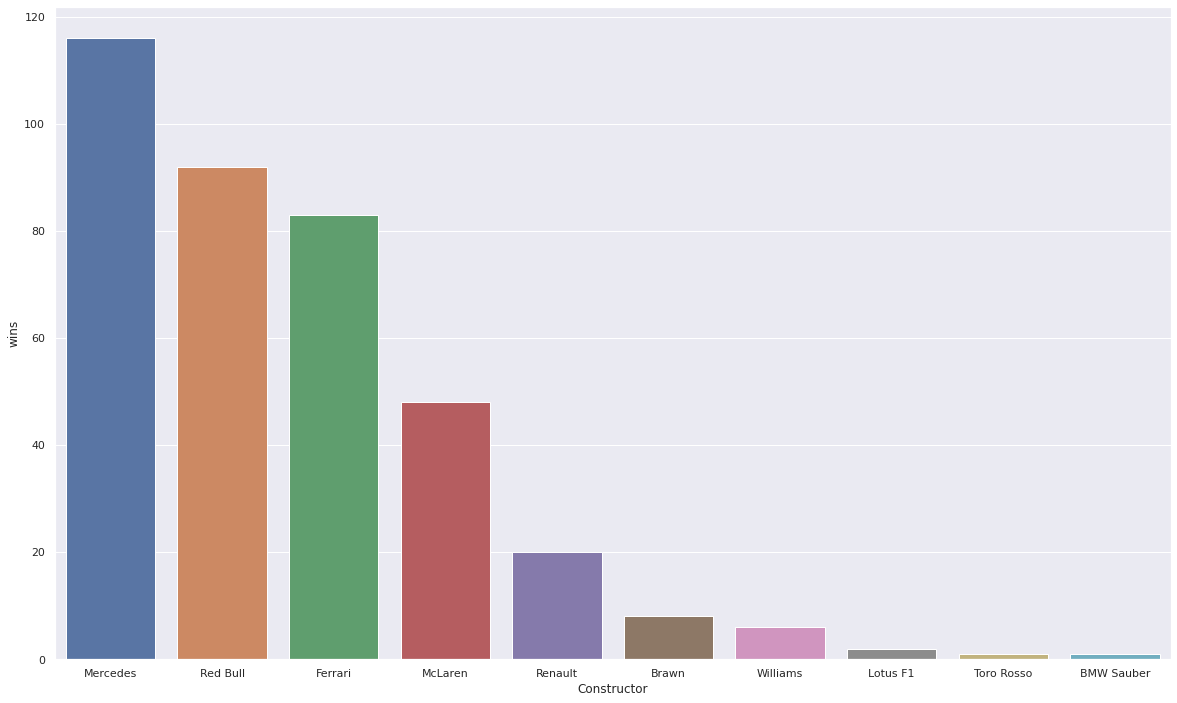

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
sns.barplot(data=sorted_contractor_df.nlargest(10, 'wins'), x="Constructor", y="wins")

In [ ]:
# Specify the number of rounds we want in our plot (in other words, specify the current round)
rounds = 18

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = data_retrieve(f'current/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        # Store the drivers' position
        current_round[driver] = int(position)
        
        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')

In [ ]:
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])


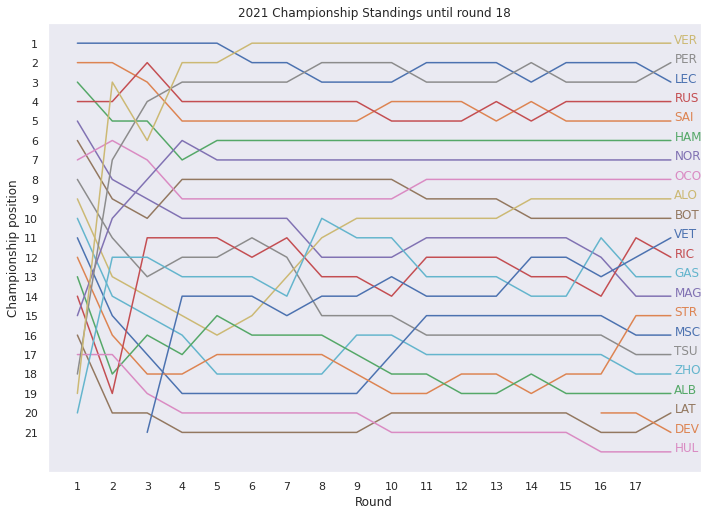

In [ ]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2021 Championship Standings until round 18")

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver],
         palette=['r', 'g'],
    )

# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

# Save the plot
plt.savefig('championship_standings.png')